In [2]:
import pandas as pd


kb=pd.read_excel('d:\\data2\\mz데이터\\kb_mz.xlsx')

In [3]:
from datetime import datetime
kb['날짜']=kb['기준년도'].astype(str)+'/'+kb['기준년월'].astype(str)  #년도와 월 컬럼 결합

kb['날짜']=pd.to_datetime(kb['날짜']).dt.to_period(freq='M') #년-월 형태로만 출력되도록 변경

In [4]:
kb1=kb.drop(['기준년도','기준년월'],axis=1) #기존의 년도와 월 컬럼 삭제


In [5]:
kb1.columns
kb1=kb1[['날짜','마케팅업종중분류명','마케팅업종세분류명','마케팅업종세세분류명', '성별구분', '연령대', '신용카드보유여부', '체크카드보유여부', '회원수', '매출건수']] #컬럼위치 재설정

In [6]:
kb1['인당_매출건수']=round(kb['매출건수']/kb1['회원수'],2) #인당 매출건수출력
kb1

,날짜,마케팅업종중분류명,마케팅업종세분류명,마케팅업종세세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,인당_매출건수
0,2019-03,일식,해산물,일식전문점,01.남성,1.20대이하,0,1,19,23,1.21
1,2019-03,일식,해산물,일식전문점,01.남성,1.20대이하,1,0,3,3,1.00
2,2019-03,일식,해산물,일식전문점,01.남성,1.20대이하,1,1,19,20,1.05
3,2019-03,일식,해산물,일식전문점,01.남성,2.30대,0,1,15,19,1.27
4,2019-03,일식,해산물,일식전문점,01.남성,2.30대,1,0,18,20,1.11
...,...,...,...,...,...,...,...,...,...,...,...
129999,2021-03,한식,해산물,낙지/쭈꾸미전문점,01.남성,1.20대이하,0,1,16,19,1.19
130000,2021-03,한식,해산물,낙지/쭈꾸미전문점,01.남성,1.20대이하,1,1,13,13,1.00
130001,2021-03,한식,해산물,낙지/쭈꾸미전문점,01.남성,2.30대,0,1,8,9,1.12
130002,2021-03,한식,해산물,낙지/쭈꾸미전문점,01.남성,2.30대,1,0,4,4,1.00


In [7]:
kb1.연령대=kb1.연령대.map(lambda x: 0 if x =='1.20대이하' else 1) #20대- 0 30대 -1

In [22]:
df= kb1[['신용카드보유여부','체크카드보유여부']]

a=kb1['신용카드보유여부']
b=kb1.loc[:,'체크카드보유여부'].apply(lambda x: 2 if x==1 else 0)



df['카드보유형태']=a+b

df

<ipython-input-22-d36dafe58a97>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['카드보유형태']=a+b


,신용카드보유여부,체크카드보유여부,카드보유형태
0,0,1,2
1,1,0,1
2,1,1,3
3,0,1,2
4,1,0,1
...,...,...,...
129999,0,1,2
130000,1,1,3
130001,0,1,2
130002,1,0,1


In [24]:
kb2=pd.concat([kb1,df.카드보유형태],axis=1) # 1- 신용카드만 보유 2-체크카드만 보유 3- 둘다 보유

kb2.drop(['신용카드보유여부','체크카드보유여부'],axis=1,inplace=True) #기존 신용카드 보유 여부 칼럼 삭제


kb2['성별구분']=kb2['성별구분'].map(lambda x: 0 if x=='01.남성' else 1)

In [23]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

kb3=kb2.copy()


kb3.마케팅업종중분류명=le.fit_transform(kb3.마케팅업종중분류명)

kb3.마케팅업종세분류명=le.fit_transform(kb3.마케팅업종세분류명)

kb3.drop(['마케팅업종세세분류명'],axis=1,inplace=True)

kb3

,날짜,마케팅업종중분류명,마케팅업종세분류명,성별구분,연령대,회원수,매출건수,인당_매출건수,카드보유형태
0,2019-03,1,8,0,0,19,23,1.21,2
1,2019-03,1,8,0,0,3,3,1.00,1
2,2019-03,1,8,0,0,19,20,1.05,3
3,2019-03,1,8,0,1,15,19,1.27,2
4,2019-03,1,8,0,1,18,20,1.11,1
...,...,...,...,...,...,...,...,...,...
129999,2021-03,2,8,0,0,16,19,1.19,2
130000,2021-03,2,8,0,0,13,13,1.00,3
130001,2021-03,2,8,0,1,8,9,1.12,2
130002,2021-03,2,8,0,1,4,4,1.00,1


In [25]:
kb3

,날짜,마케팅업종중분류명,마케팅업종세분류명,성별구분,연령대,회원수,매출건수,인당_매출건수,카드보유형태
0,2019-03,1,8,0,0,19,23,1.21,2
1,2019-03,1,8,0,0,3,3,1.00,1
2,2019-03,1,8,0,0,19,20,1.05,3
3,2019-03,1,8,0,1,15,19,1.27,2
4,2019-03,1,8,0,1,18,20,1.11,1
...,...,...,...,...,...,...,...,...,...
129999,2021-03,2,8,0,0,16,19,1.19,2
130000,2021-03,2,8,0,0,13,13,1.00,3
130001,2021-03,2,8,0,1,8,9,1.12,2
130002,2021-03,2,8,0,1,4,4,1.00,1


In [26]:
x=kb3[['마케팅업종중분류명','마케팅업종세분류명','성별구분','회원수','매출건수','인당_매출건수','카드보유형태']]
y=kb3['연령대']

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [28]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=200,random_state=1)

model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

In [29]:
print('훈련 세트 정확도 : {:.3f}'.format(model.score(x_train,y_train)))
print('테스트 세트 정확도:{:.3f}'.format(model.score(x_test,y_test)))

훈련 세트 정확도 : 0.802
테스트 세트 정확도:0.615


In [30]:
model.feature_importances_

array([0.02975756, 0.12321088, 0.02561628, 0.26040891, 0.26702692,
       0.20897522, 0.08500423])

In [31]:
Z=kb3.loc[kb3['연령대']==0,]
M=kb3.loc[kb3['연령대']==1,]

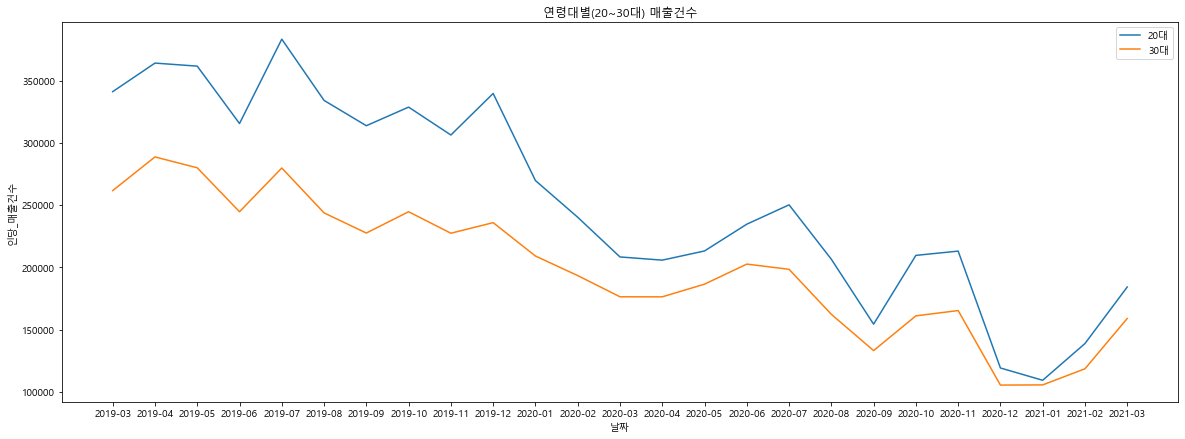

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fonm
plt.rcParams['font.family']='Malgun Gothic'


fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')#배경색
ax=fig.add_subplot() #프레임 생성



y1=Z.groupby('날짜')['매출건수'].sum()
y2=M.groupby('날짜')['매출건수'].sum()

x=np.arange(0,25)
xlab=kb3['날짜'].unique()


ax.plot(x,y1,label='20대')
ax.plot(x,y2,label='30대')


ax.legend()#범례
plt.xticks(x,xlab)
plt.xlabel('날짜')
plt.ylabel('인당_매출건수')
plt.title('연령대별(20~30대) 매출건수')
plt.show()

In [33]:
kb4=kb3.copy()
kb4

,날짜,마케팅업종중분류명,마케팅업종세분류명,성별구분,연령대,회원수,매출건수,인당_매출건수,카드보유형태
0,2019-03,1,8,0,0,19,23,1.21,2
1,2019-03,1,8,0,0,3,3,1.00,1
2,2019-03,1,8,0,0,19,20,1.05,3
3,2019-03,1,8,0,1,15,19,1.27,2
4,2019-03,1,8,0,1,18,20,1.11,1
...,...,...,...,...,...,...,...,...,...
129999,2021-03,2,8,0,0,16,19,1.19,2
130000,2021-03,2,8,0,0,13,13,1.00,3
130001,2021-03,2,8,0,1,8,9,1.12,2
130002,2021-03,2,8,0,1,4,4,1.00,1


In [38]:
kb4.날짜.astype(str)

kb4.날짜=le.fit_transform(kb4['날짜'])

In [41]:
mask1=kb4.날짜.between(0,3)
mask2=kb4.날짜.between(4,6)
mask3=kb4.날짜.between(7,9)
mask4=kb4.날짜.between(10,12)
mask5=kb4.날짜.between(13,15)
mask6=kb4.날짜.between(16,18)
mask7=kb4.날짜.between(19,21)
mask8=kb4.날짜.between(22,24)

In [44]:
kb4.loc[mask1,'날짜']=0
kb4.loc[mask2,'날짜']=1
kb4.loc[mask3,'날짜']=2
kb4.loc[mask4,'날짜']=3
kb4.loc[mask5,'날짜']=4
kb4.loc[mask6,'날짜']=5
kb4.loc[mask7,'날짜']=6
kb4.loc[mask8,'날짜']=7

In [45]:
kb5=kb4.copy()

C:\Users\wanw9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wanw9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


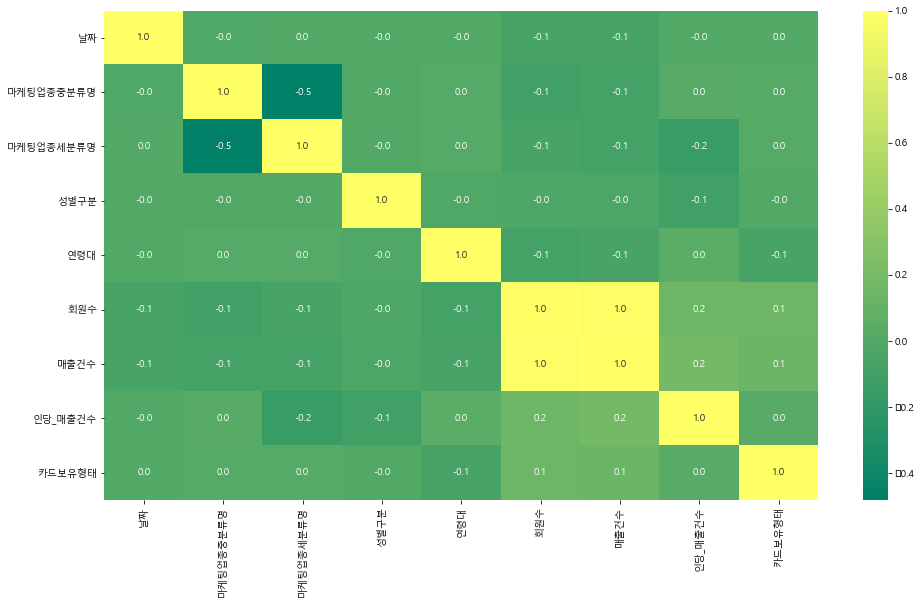

In [46]:
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(kb5.corr(),cmap='summer',annot=True,fmt="0.1f")
plt.show()

In [47]:
x2=kb5[['날짜','마케팅업종중분류명', '마케팅업종세분류명','성별구분','회원수', '매출건수', '인당_매출건수','카드보유형태']]
y2=kb5['연령대']

In [48]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=1,stratify=y2)


In [49]:
model.fit(x_train2,y_train2)

RandomForestClassifier(n_estimators=200, random_state=1)

In [50]:
print('훈련 세트 정확도 : {:.3f}'.format(model.score(x_train2,y_train2)))
print('테스트 세트 정확도:{:.3f}'.format(model.score(x_test2,y_test2)))

훈련 세트 정확도 : 0.894
테스트 세트 정확도:0.616


In [51]:
from sklearn.tree import DecisionTreeClassifier

model2=DecisionTreeClassifier()

model2.fit(x_train2,y_train2)

DecisionTreeClassifier()

In [52]:
print('훈련 세트 정확도 : {:.3f}'.format(model2.score(x_train2,y_train2)))
print('테스트 세트 정확도:{:.3f}'.format(model2.score(x_test2,y_test2)))

훈련 세트 정확도 : 0.894
테스트 세트 정확도:0.586


In [53]:
kb6=kb5.copy()
kb6.날짜=kb6.날짜.astype(str)
kb6
kb6=kb6[['날짜', '마케팅업종중분류명', '마케팅업종세분류명','성별구분','회원수','매출건수', '인당_매출건수', '카드보유형태','연령대']]

In [55]:

x3=kb6.iloc[:,:-1]
y3=kb6.iloc[:,-1].to_numpy()

x3=pd.get_dummies(x3)


In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

x3=scaler.fit_transform(x3)

In [57]:
x_train3,x_test3,y_train3,y_test3 =train_test_split(x3,y3,test_size=0.2,random_state=1,stratify=y3)

In [58]:
from sklearn.linear_model import LogisticRegression

model3=LogisticRegression()

logreg=model3.fit(x_train3,y_train3)

In [59]:

train_result=model3.predict(x_train3)
test_result=model3.predict(x_test3)

In [60]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train3,train_result))
print(accuracy_score(y_test3,test_result))

0.5549551455246483
0.551440329218107


In [63]:
kb6=kb5.copy()

In [67]:
bcov=kb6.loc[kb6.날짜.between(0,3),]
acov=kb6.loc[kb6.날짜.between(4,7),]

In [76]:
bcov.columns

bcov2=bcov[['날짜', '마케팅업종중분류명', '마케팅업종세분류명', '성별구분', '회원수', '매출건수', '인당_매출건수','카드보유형태','연령대']]

x4=bcov2.iloc[:,:-1]
y4=bcov2.iloc[:,-1].to_numpy()



In [77]:
x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,test_size=0.2,random_state=1,stratify=y4)

In [78]:
model4=RandomForestClassifier()

model4.fit(x_train4,y_train4)

RandomForestClassifier()

In [81]:
train4_result=model4.predict(x_train4)
test4_result=model4.predict(x_test4)

In [82]:
print(accuracy_score(y_train4,train4_result))
print(accuracy_score(y_test4,test4_result))

0.8978869627654118
0.6181619256017505


In [84]:
acov.columns

acov2=bcov[['날짜', '마케팅업종중분류명', '마케팅업종세분류명', '성별구분', '회원수', '매출건수', '인당_매출건수','카드보유형태','연령대']]

x5=acov2.iloc[:,:-1]
y5=acov2.iloc[:,-1].to_numpy()

In [85]:
x_train5,x_test5,y_train5,y_test5=train_test_split(x5,y5,test_size=0.2,random_state=1,stratify=y5)

In [86]:
model5=RandomForestClassifier()

model5.fit(x_train5,y_train5)

RandomForestClassifier()

In [87]:
train5_result=model5.predict(x_train5)
test5_result=model5.predict(x_test5)

In [88]:
print(accuracy_score(y_train5,train5_result))
print(accuracy_score(y_test5,test5_result))

0.8978527712243991
0.6143326039387309
